# Prediction using supervised ML
 
 To Predict the percentage of marks of the students based on the number of hours they studied

### Author: Harshita Kedia

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [10]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Check if there any null value in the Dataset
data.isnull == True

False

#### Since there are no null values in the dataset, we can now visualize the data

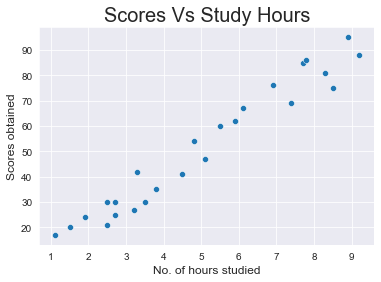

In [11]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Scores Vs Study Hours',size=20)
plt.ylabel('Scores obtained', size=12)
plt.xlabel('No. of hours studied', size=12)
plt.show()

##### From the above scatter, we can see a correlation between the 'Scores obtained' and 'No. of hours Studied', Lets plot a regression line to confirm the correlation.

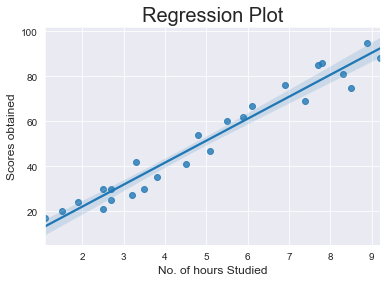

In [8]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Scores obtained', size=12)
plt.xlabel('No. of hours Studied', size=12)
plt.show()

In [9]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


##### It is now confirmed that the variables are positively correlated

## Training the Model

In [12]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [13]:
# Fitting the data into the model
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


In [14]:
# Predicting the scores
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Scores': [k for k in pred_y]})
prediction

,Hours,Predicted Scores
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


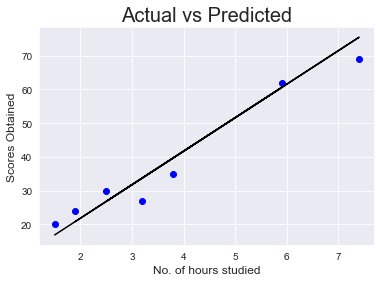

In [16]:
# Visually comparing the actual scores with the predicted scores
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Scores Obtained', size=12)
plt.xlabel('No. of hours studied', size=12)
plt.show()

In [17]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [18]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


##### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.